# **Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import random
import torch  # the main PyTorch package
import torch.nn as nn  # defines useful features like linear networks layers, activation functions, loss functions etc.
import torch.optim as optim  # contains different optimization routines

!pip install -U scikit-learn
from sklearn.metrics import confusion_matrix
import seaborn as sns


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# **Data Mounting from Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Haverford/Computational Methods in Science/EEG.machinelearing_data_BRMH.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


# **Data Pre-Processing**

In [ ]:
# Complete Dataset from Kaggle
All = np.array(pd.read_csv(file_path))

# Labels extracted from column 6
All_labels = All[:, 6]
print('Size of all labels vector is: ' + str(All_labels.shape))

# EEG data is from the 8th till the last columns
All_EEG = All[:, 8:]

# This step was included later to remove Nans from column 14. Step to do this is described later.
All_EEG = np.delete(All_EEG, 114, axis=1) ## Column 14 is NaN
print('Size of all labels vector is: ' + str(All_EEG.shape))


#### Splits Dataset Randomly ########## (Not after certain Index)
def divFunc(data, labels):
  SampleSize = len(data)
  TrainSize = int(0.8*SampleSize)                                  # Train set is 80% of complete set
  TestSize = int(0.2*SampleSize)                                   # Test set is 20% of complete set
  Train_indices = random.sample(range(SampleSize), TrainSize)      # random.sample generates TrainSize number of random element indices
  Test_indices = list(set(range(SampleSize)) - set(Train_indices)) # Remaining points are used for the test indices
  TestSet =[]
  TestLabels = []
  TrainSet = []
  TrainLabels = []
# Appending test/training datapoints and labels into empty vectors
  for number in Train_indices:
    TrainSet.append(data[number])
    TrainLabels.append(labels[number])
  for number in Test_indices:
    TestSet.append(data[number])
    TestLabels.append(labels[number])
  return TrainSet, TrainLabels, TestSet, TestLabels

EEG_train, train_labels, EEG_test, test_labels = divFunc(All_EEG, All_labels)

print('size of test data is: ' + str(np.shape(EEG_test)))
print('size of test data labels is' + str(np.shape(test_labels)))
print('size of training data is: ' + str(np.shape(EEG_train)))
print('size of training dataset labels is: ' + str(np.shape(train_labels)))

######## Converting 'word'labels to numerical labels ############
dictionary = {'Addictive disorder': 0, 'Trauma and stress related disorder':1, 'Mood disorder': 2, 'Healthy control': 3, 'Obsessive compulsitve disorder': 4, 'Schizophrenia': 5, 'Anxiety disorder': 6, 'Obsessive compulsive disorder': 4}
num_test_labels = [dictionary[label] for label in test_labels]
num_train_labels = [dictionary[label] for label in train_labels]

print('size of numerical training dataset labels is: ' + str(np.shape(num_train_labels)))
print('size of numerical test dataset labels is: ' + str(np.shape(num_test_labels)))

########. Reshaping Labels matrix into 7 columns matrix with zeros #################
train_bools = np.zeros([len(num_train_labels), 7])
test_bools = np.zeros([len(num_test_labels), 7])


####### Adding 1's to columns to indicate labels of each sample ####################
for i in range(len(train_bools)):
 train_bools[[i], num_train_labels[i]] = 1

for i in range(len(test_bools)):
 test_bools[[i], num_test_labels[i]] = 1


Size of all labels vector is: (945,)
Size of all labels vector is: (945, 1140)
size of test data is: (189, 1140)
size of test data labels is(189,)
size of training data is: (756, 1140)
size of training dataset labels is: (756,)
size of numerical training dataset labels is: (756,)
size of numerical test dataset labels is: (189,)


In [ ]:
#### Locating NaNs ############
print(np.shape(EEG_train))
print(type(EEG_train))
np.where(pd.isnull(EEG_train))   ## found as column 114, deleted above



(756, 1140)
<class 'list'>


(array([], dtype=int64), array([], dtype=int64))

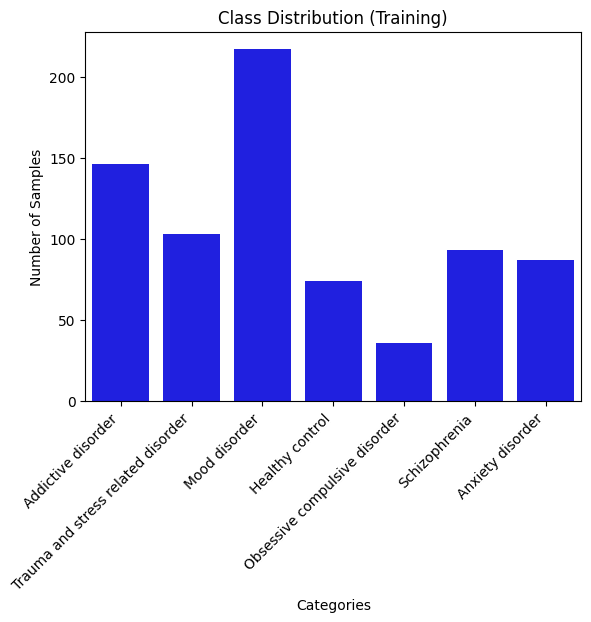

40
25
49
21
10
24
20


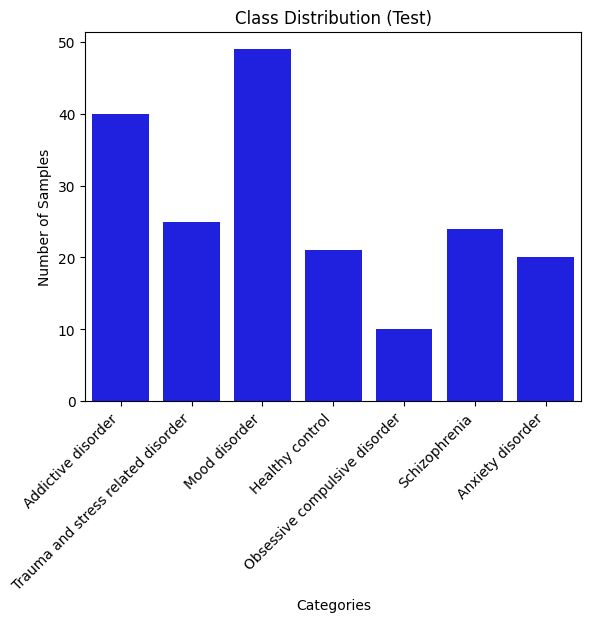

In [ ]:
########## Creating a bar graph to view class distributions ##########
true_labels = num_train_labels.copy()

# Initializing number of each disorder
AddDis = 0
TSRD = 0
MD = 0
HC = 0
OCD = 0
Schiz = 0
AD = 0

# Calculating number of each disorder in train set
for element in true_labels:
  if element == 0:
    AddDis += 1
  if element == 1:
    TSRD += 1
  if element == 2:
    MD += 1
  if element == 3:
    HC += 1
  if element == 4:
    OCD += 1
  if element == 5:
    Schiz += 1
  if element == 6:
    AD += 1

# Lables for bar graph
categories = ['Addictive disorder', 'Trauma and stress related disorder', 'Mood disorder', 'Healthy control', 'Obsessive compulsive disorder', 'Schizophrenia', 'Anxiety disorder']
# Distribution of each class
weights = [AddDis, TSRD, MD, HC, OCD, Schiz, AD]
# Bar graph plot
sns.barplot(x=categories, y=weights, color='blue')
plt.xticks(np.arange(len(categories)), categories, rotation=45, ha='right')
plt.xlabel('Categories')
plt.ylabel('Number of Samples')
plt.title('Class Distribution (Training)')
plt.show()


###### Test Set #########################
true_labels = num_test_labels.copy()

# Initializing number of each disorder
AddDis = 0
TSRD = 0
MD = 0
HC = 0
OCD = 0
Schiz = 0
AD = 0
## Calculating number of each disorder in test set
for element in true_labels:
  if element == 0:
    AddDis += 1
  if element == 1:
    TSRD += 1
  if element == 2:
    MD += 1
  if element == 3:
    HC += 1
  if element == 4:
    OCD += 1
  if element == 5:
    Schiz += 1
  if element == 6:
    AD += 1

print(AddDis)
print(TSRD)
print(MD)
print(HC)
print(OCD)
print(Schiz)
print(AD)

## Bar graph plot
categories = ['Addictive disorder', 'Trauma and stress related disorder', 'Mood disorder', 'Healthy control', 'Obsessive compulsive disorder', 'Schizophrenia', 'Anxiety disorder']
weights = [AddDis, TSRD, MD, HC, OCD, Schiz, AD]

sns.barplot(x=categories, y=weights, color='blue')
plt.xticks(np.arange(len(categories)), categories, rotation=45, ha='right')
plt.xlabel('Categories')
plt.ylabel('Number of Samples')
plt.title('Class Distribution (Test)')
plt.show()



# **Neural Network with All Attributes**

In [ ]:
### Neural Network Model Design ####
model = nn.Sequential(
    nn.Linear(1140, 700),
    nn.ReLU(),
    nn.Linear(700, 343),
    nn.ReLU(),
    nn.Linear(343, 49),
    nn.ReLU(),
    nn.Linear(49, 7),
    nn.Sigmoid()
)
print(model)

# convert data to tensors, reformat
xTrainTensor = torch.tensor(EEG_train, dtype=torch.float32)
yTrainTensor = torch.tensor(train_bools, dtype=torch.float32)
xTestTensor = torch.tensor(EEG_test, dtype=torch.float32)
yTestTensor = torch.tensor(test_bools, dtype=torch.float32)

### Class weights defined here, and incorporated in loss calculation
class_weights = torch.tensor([0.6, 1.0 , 0.5, 1.3, 2.5, 1.0, 1.0], dtype=torch.float32)
loss_fn = nn.CrossEntropyLoss(weight=class_weights) ######## Better for Multi-Class Classification, as opposed to MSE

optimizer = optim.SGD(model.parameters(), lr=0.001) ####### Optimization using SGD (Stochastic GD)


Sequential(
  (0): Linear(in_features=1140, out_features=700, bias=True)
  (1): ReLU()
  (2): Linear(in_features=700, out_features=343, bias=True)
  (3): ReLU()
  (4): Linear(in_features=343, out_features=49, bias=True)
  (5): ReLU()
  (6): Linear(in_features=49, out_features=7, bias=True)
  (7): Sigmoid()
)


<ipython-input-6-b6374fce548f>:15: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  xTrainTensor = torch.tensor(EEG_train, dtype=torch.float32)


In [ ]:
##### Model Training #######
# Number of iterations
nIts = 1000
# Storing loss values
trainLossList = np.zeros(nIts)
testLossList = np.zeros(nIts)

for it in range(nIts):
  y_predTrain = model(xTrainTensor)
  loss_Train = loss_fn(y_predTrain, yTrainTensor)
  trainLossList[it] = loss_Train

  y_predTest = model(xTestTensor)
  loss_Test = loss_fn(y_predTest, yTestTensor)
  testLossList[it] = loss_Test

  optimizer.zero_grad()
  loss_Train.backward()
  optimizer.step()


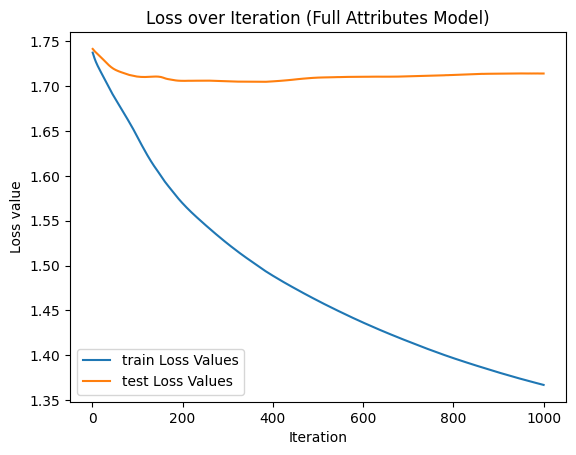

In [ ]:
#### Plot for Loss over Iteration
plt.figure()
plt.plot(torch.arange(1, 1001, 1), trainLossList, label = 'train Loss Values')
plt.plot(torch.arange(1, 1001, 1), testLossList, label = 'test Loss Values')
plt.xlabel('Iteration')
plt.ylabel('Loss value')
plt.title('Loss over Iteration (Full Attributes Model)')
#plt.ylim(0.14, 0.16)
#plt.xlim(0, 50)
plt.legend()

training accuracy is39.682539682539684%


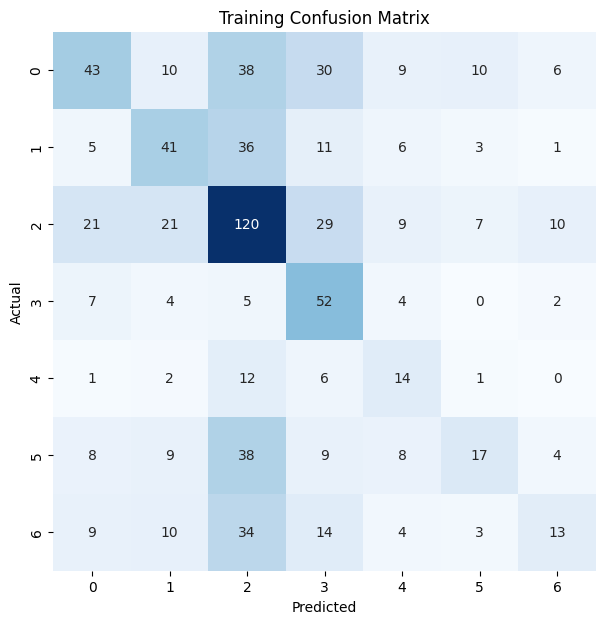

test accuracy is26.455026455026452%


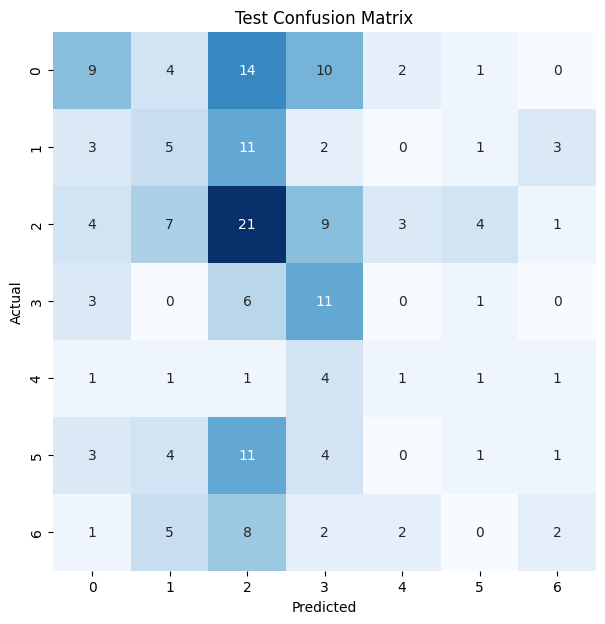

In [ ]:
############################ Training Set (Accuracy + Confusion Matrix) ##################################

# y_predTrain and yTrainTensor incorrect classifications, normalizing output to 1's and 0's
TrainMatrix = torch.zeros(yTrainTensor.shape)                       # Initializing an empty zeros matrix to store output predicted labels

for row in torch.arange(len(y_predTrain)):                          # Iterating through the number of training samples (rows)
  MaxTrainVal = torch.max(y_predTrain[row])                         # Finding the maximum value in each row
  MaxTrainLocation = torch.where(y_predTrain[row] == MaxTrainVal)   # Finding the location of the max value in that row
  TrainMatrix[row, MaxTrainLocation[0]] = 1                         # Setting that location in the zeros matrix to 1

wrongRows = 0                                                       # Initializing number of wrong rows (samples)

# Calculating the accuracy for the training dataset predictions
for row in torch.arange(len(yTrainTensor)):                         # Iterating through each value in the predicted labels matrix
  for col in torch.arange(7):
    if yTrainTensor[row, col] != TrainMatrix[row, col]:             # If actual label does not predicted label
      wrongRows += 1                                                # Add one to number of wrong rows
wrongRows = wrongRows*0.5                                           # Divide by two since the for-loop will add 2 for every wrong row
accuracy = ((756 - wrongRows)/(756))*100                            # Calculate accuracy based on number of rows/samples in training dataset
print('training accuracy is' + str(accuracy) + '%')

## Confusion Matrix takes in true label (yTrainTensor) and predicted label (TrainMatrix) and compares their indices
confusionMat = confusion_matrix(yTrainTensor.argmax(axis=1), TrainMatrix.argmax(axis=1))
## Plotting confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(confusionMat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



############################ Training Set (Accuracy + Confusion Matrix) ##################################

# y_predTest and yTestTensor incorrect classifications, normalizing output to 1s and 0s
TestMatrix = torch.zeros(yTestTensor.shape)                      # Initializing an empty zeros matrix to store output predicted labels

for row in torch.arange(len(y_predTest)):                        # Iterating through the number of training samples (rows)
  MaxTestVal = torch.max(y_predTest[row])                        # Finding the maximum value in each row
  MaxTestLocation = torch.where(y_predTest[row] == MaxTestVal)   # Finding the location of the max value in that row
  TestMatrix[row, MaxTestLocation[0]] = 1                           # Setting that location in the zeros matrix to 1

wrongRows = 0                                                    # Initializing number of wrong rows (samples)

# Calculating the accuracy for the training dataset predictions
for row in torch.arange(len(yTestTensor)):                       # Iterating through each value in the predicted labels matrix
  for col in torch.arange(7):
    if yTestTensor[row, col] != TestMatrix[row, col]:            # If actual label does not predicted label
      wrongRows += 1                                             # Add one to number of wrong rows
wrongRows = wrongRows*0.5                                        # Divide by two since the for-loop will add 2 for every wrong row
accuracy = ((189 - wrongRows)/(189))*100                         # Calculate accuracy based on number of rows/samples in training dataset
print('test accuracy is' + str(accuracy) + '%')

## Confusion Matrix takes in true label (yTestTensor) and predicted label (TestMatrix) and compares their indices
confusionMat_test = confusion_matrix(yTestTensor.argmax(axis=1), TestMatrix.argmax(axis=1))
## Plotting Confusion patrix
plt.figure(figsize=(7, 7))
sns.heatmap(confusionMat_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Neural Network with PC Inputs**

[114135.04532212  32508.66237995  16672.10648508  14371.96583438
  12922.23450176   8572.26560743   7213.74279149   6472.51219672
   5766.14082685   4507.77650157   3968.17093015   3936.82293184
   3636.29790752   3367.74667425   3099.1604498    2675.49101538
   2647.41086458   2582.69092784   2237.14512411   2165.16178928
   1961.77538148   1917.86278645   1803.83052047   1728.97461906
   1691.48847533   1624.00303793   1508.00137882   1457.99979221
   1435.4645781    1365.83337436   1327.49646772   1234.78370562
   1169.70082388   1105.26177213   1098.9790216    1069.91554122
   1047.77462047    978.65010267    920.4945201     913.11567316
    873.29586398    838.11124444    783.50934208    770.39722992
    741.33268756    733.95821731    717.41435105    653.68661169
    649.06540269    638.14747281]


Text(0.5, 1.0, 'Scree Plot for Training Dataset')

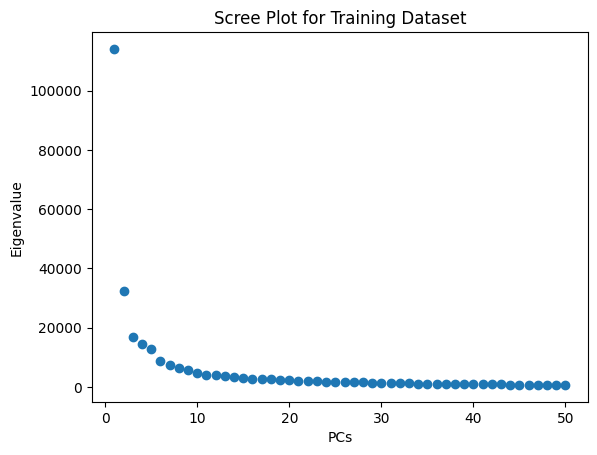

In [ ]:
### PCA on Training Dataset ###
pca = PCA(n_components=50) # Number of components
pca.fit(EEG_train) # perform PCA
EEG_train_proj = pca.transform(EEG_train)  # transform data into PCA space
print(pca.explained_variance_) # 'Importance' of each PC

# Plotting Scree plot for first 50 components
plt.scatter(np.arange(1, 51,1), pca.explained_variance_)
plt.xlabel('PCs')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot for Training Dataset')


[109502.53541273  32340.39467385  17769.468513    13761.79792298
   9262.35141089   8596.5822877    7807.72739371   6415.81663526
   6050.7979064    5193.92770608   4492.39726887   3895.65762523
   3833.13706136   3581.88794349   3192.52430253   2835.77065623
   2677.10030569   2373.84721975   2276.40655327   2153.14703742
   2075.30858255   2063.45796338   1924.23698622   1850.2887907
   1662.54283712   1644.2089218    1555.46538071   1485.38120727
   1430.04936842   1320.81570521   1219.10282049   1206.83072331
   1168.58284573   1104.30107946   1089.41036966   1011.92748737
    992.29277857    934.01384315    863.25182347    842.80705763
    795.62509196    773.85482798    759.40861763    731.6515183
    727.76893831    696.93006287    653.86093309    626.50479401
    609.97462012    579.63675646]


Text(0.5, 1.0, 'Scree Plot for Test Dataset')

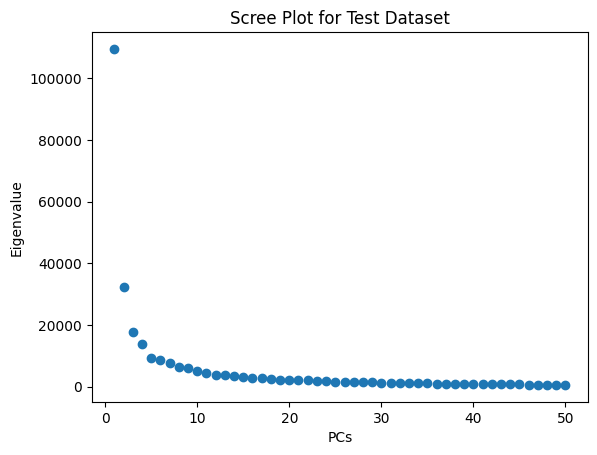

In [ ]:
### PCA on Test Set ###
pca = PCA(n_components=50) # Number of components
pca.fit(EEG_test) # Perform PCA
EEG_test_proj = pca.transform(EEG_test) # transform data into PC space
print(pca.explained_variance_)

## Scree plot using explained_variance and component number
plt.scatter(np.arange(1, 51,1), pca.explained_variance_)
plt.xlabel('PCs')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot for Test Dataset')

In [ ]:
### Neural Network Model Design ####
model = nn.Sequential(
    nn.Linear(15, 700),
    nn.ReLU(),
    nn.Linear(700, 343),
    nn.ReLU(),
    nn.Linear(343, 49),
    nn.ReLU(),
    nn.Linear(49, 7),
    nn.Sigmoid()
)
print(model)

# convert labels into by 7 matrix, with 0s and 1s
# convert data to tensors, reformat
xTrainTensor = torch.tensor(EEG_train_proj[:,:15], dtype=torch.float32) # First 15 PCs
yTrainTensor = torch.tensor(train_bools, dtype=torch.float32)
xTestTensor = torch.tensor(EEG_test_proj[:,:15], dtype=torch.float32)   # First 15 PCs
yTestTensor = torch.tensor(test_bools, dtype=torch.float32)

### Class weights defined here, and incorporated in loss calculation
class_weights = torch.tensor([0.6, 1.0 , 0.5, 1.0, 2.5, 1.0, 1.0], dtype=torch.float32)
loss_fn = nn.CrossEntropyLoss(weight=class_weights) ######## Better for Multi-Class Classification, as opposed to MSE

optimizer = optim.SGD(model.parameters(), lr=0.001) ####### Optimization using SGD (Stochastic GD)

Sequential(
  (0): Linear(in_features=15, out_features=700, bias=True)
  (1): ReLU()
  (2): Linear(in_features=700, out_features=343, bias=True)
  (3): ReLU()
  (4): Linear(in_features=343, out_features=49, bias=True)
  (5): ReLU()
  (6): Linear(in_features=49, out_features=7, bias=True)
  (7): Sigmoid()
)


In [ ]:
### Network training for 1000 iterations
nIts = 1000
trainLossList = np.zeros(nIts)
testLossList = np.zeros(nIts)

for it in range(nIts):
  y_predTrain = model(xTrainTensor)
  loss_Train = loss_fn(y_predTrain, yTrainTensor)
  trainLossList[it] = loss_Train

  y_predTest = model(xTestTensor)
  loss_Test = loss_fn(y_predTest, yTestTensor)
  testLossList[it] = loss_Test

  optimizer.zero_grad()
  loss_Train.backward()
  optimizer.step()

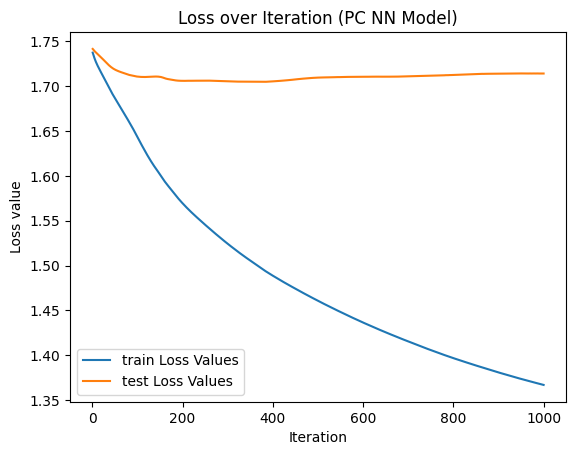

In [ ]:
# Plot of loss value over iteration
plt.figure()
plt.plot(torch.arange(1, 1001, 1), trainLossList, label = 'train Loss Values')
plt.plot(torch.arange(1, 1001, 1), testLossList, label = 'test Loss Values')
plt.xlabel('Iteration')
plt.ylabel('Loss value')
plt.title('Loss over Iteration (PC NN Model)')

plt.legend()

training accuracy is50.264550264550266%


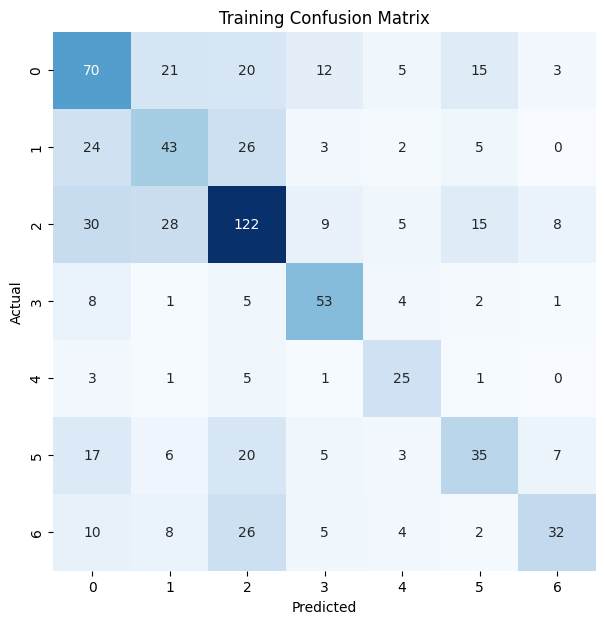

test accuracy is18.51851851851852%


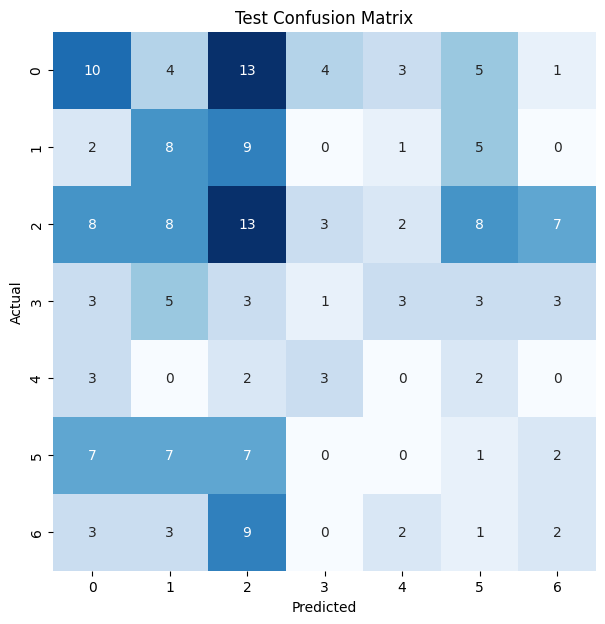

In [ ]:
############################ Training Set (Accuracy + Confusion Matrix) ##################################

# y_predTrain and yTrainTensor incorrect classifications, normalizing output to 1's and 0's
TrainMatrix = torch.zeros(yTrainTensor.shape)                       # Initializing an empty zeros matrix to store output predicted labels

for row in torch.arange(len(y_predTrain)):                          # Iterating through the number of training samples (rows)
  MaxTrainVal = torch.max(y_predTrain[row])                         # Finding the maximum value in each row
  MaxTrainLocation = torch.where(y_predTrain[row] == MaxTrainVal)   # Finding the location of the max value in that row
  TrainMatrix[row, MaxTrainLocation[0]] = 1                         # Setting that location in the zeros matrix to 1

wrongRows = 0                                                       # Initializing number of wrong rows (samples)

# Calculating the accuracy for the training dataset predictions
for row in torch.arange(len(yTrainTensor)):                         # Iterating through each value in the predicted labels matrix
  for col in torch.arange(7):
    if yTrainTensor[row, col] != TrainMatrix[row, col]:             # If actual label does not predicted label
      wrongRows += 1                                                # Add one to number of wrong rows
wrongRows = wrongRows*0.5                                           # Divide by two since the for-loop will add 2 for every wrong row
accuracy = ((756 - wrongRows)/(756))*100                            # Calculate accuracy based on number of rows/samples in training dataset
print('training accuracy is' + str(accuracy) + '%')

## Confusion Matrix takes in true label (yTrainTensor) and predicted label (TrainMatrix) and compares their indices
confusionMat = confusion_matrix(yTrainTensor.argmax(axis=1), TrainMatrix.argmax(axis=1))
## Plotting confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(confusionMat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



############################ Training Set (Accuracy + Confusion Matrix) ##################################

# y_predTest and yTestTensor incorrect classifications, normalizing output to 1s and 0s
TestMatrix = torch.zeros(yTestTensor.shape)                      # Initializing an empty zeros matrix to store output predicted labels

for row in torch.arange(len(y_predTest)):                        # Iterating through the number of training samples (rows)
  MaxTestVal = torch.max(y_predTest[row])                        # Finding the maximum value in each row
  MaxTestLocation = torch.where(y_predTest[row] == MaxTestVal)   # Finding the location of the max value in that row
  TestMatrix[row, MaxTestLocation[0]] = 1                           # Setting that location in the zeros matrix to 1

wrongRows = 0                                                    # Initializing number of wrong rows (samples)

# Calculating the accuracy for the training dataset predictions
for row in torch.arange(len(yTestTensor)):                       # Iterating through each value in the predicted labels matrix
  for col in torch.arange(7):
    if yTestTensor[row, col] != TestMatrix[row, col]:            # If actual label does not predicted label
      wrongRows += 1                                             # Add one to number of wrong rows
wrongRows = wrongRows*0.5                                        # Divide by two since the for-loop will add 2 for every wrong row
accuracy = ((189 - wrongRows)/(189))*100                         # Calculate accuracy based on number of rows/samples in training dataset
print('test accuracy is' + str(accuracy) + '%')

## Confusion Matrix takes in true label (yTestTensor) and predicted label (TestMatrix) and compares their indices
confusionMat_test = confusion_matrix(yTestTensor.argmax(axis=1), TestMatrix.argmax(axis=1))
## Plotting Confusion patrix
plt.figure(figsize=(7, 7))
sns.heatmap(confusionMat_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()